**Mô hình hỗn hợp** (mixture model) thường được sử dụng để mô hình hóa các phân phối mật độ phức tạp. Ví dụ, bạn có thể quan tâm đến việc khám phá các mẫu trong dữ liệu điều tra dân số bao gồm thông tin về tuổi, thu nhập, nghề nghiệp và các chiều khác của một người. Nếu chúng ta vẽ dữ liệu thu được trong không gian nhiều chiều, chúng ta có thể phát hiện ra mật độ không đồng nhất được đặc trưng bởi các nhóm hoặc cụm các điểm dữ liệu. Chúng ta có thể mô hình hóa mỗi cụm bằng cách sử dụng một phân phối xác suất cơ bản. Mô hình hỗn hợp bao gồm sự kết hợp lồi (convex combination) của $K$ mô hình cơ bản. Trong trường hợp của mô hình hỗn hợp Gaussian, phân phối cơ bản là Gaussian và có thể được viết như sau.

$$
p(x_i|\theta) = \sum_{k=1}^{K} \pi_k p_k(x_i|\theta) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \tag{1}
$$

Ở đây, $ \pi_k $ là các tỷ lệ trộn lẫn (mixing proportion) thỏa mãn $ 0 \leq \pi_k \leq 1 $ và $ \sum_{k} \pi_k = 1 $. Trái ngược với K-means chỉ mô hình hóa trung bình của cụm, GMM còn mô hình hóa cả hiệp phương sai (covariance) của cụm. Do đó, GMM có thể nắm bắt dữ liệu chính xác hơn.

Thuật toán *kỳ vọng tối đa hóa* (EM) (expectation maximization) cung cấp một cách tính toán các ước lượng ML/MAP khi chúng ta có các biến tiềm ẩn chưa quan sát hoặc dữ liệu thiếu. EM khai thác thực tế rằng nếu dữ liệu được quan sát đầy đủ, thì các ước lượng ML/MAP sẽ dễ tính toán. Cụ thể, EM là một thuật toán lặp đi lặp lại giữa việc suy luận các biến tiềm ẩn, với các tham số cho trước (bước E) và sau đó tối ưu hóa các tham số với dữ liệu đã được điền đầy đủ (bước M).

Trong thuật toán EM, chúng ta định nghĩa log-likelihood của dữ liệu đầy đủ $l_c(\theta)$, trong đó $x_i$ là các biến ngẫu nhiên quan sát được và $z_i$ là không quan sát được. Vì chúng ta không biết $z_i$, chúng ta không thể tính $p(x_i, z_i | \theta)$, nhưng chúng ta có thể tính kỳ vọng của $l_c(\theta)$ với tham số $\theta^{(k-1)}$ từ lần lặp trước.

$$
l_c(\theta) = \sum_{i=1}^{N} \log p(x_i, z_i|\theta) \tag{2}
$$

Mục tiêu của bước E là tính $Q(\theta, \theta^{(k-1)})$, mà trên đó các ước lượng ML/MAP phụ thuộc. Mục tiêu của bước M là tính lại $\theta$ bằng cách tìm các ước lượng ML/MAP.

**Bước E** : $Q\left(\theta, \theta^{(k-1)}\right) = E_{\theta^{(k-1)}} \left[ l_c(\theta)|D, \theta^{(k-1)} \right]$

**Bước M** : $\theta^{(k)} = \arg \max_{\theta} Q \left(\theta, \theta^{(k-1)}\right) + \log p(\theta) \tag{3}$

Để suy ra thuật toán EM cho GMM, trước tiên chúng ta cần tính log-likelihood kỳ vọng của dữ liệu đầy đủ.

$$
Q(\theta, \theta^{(k-1)}) = E \left[ \sum_{i} \log p(x_i, z_i|\theta) \right]
$$

$$
= \sum_i E \left[ \log \prod_{k=1}^{K} \left( \pi_k p(x_i|\theta_k) \right)^{[z_i=k]} \right]
$$

$$
= \sum_i \sum_k E \left[ [z_i = k] \right] \log \left( \pi_k p(x_i|\theta_k) \right)
$$

$$
= \sum_i \sum_k p \left( z_i = k | x_i, \theta^{(k-1)} \right) \log \left( \pi_k p(x_i|\theta_k) \right)
$$

$$
= \sum_i \sum_k r_{ik} \log \pi_k + \sum_i \sum_k r_{ik} \log p(x_i|\theta_k) \tag{4}
$$

Ở đây, $r_{ik} = p(z_i = k | x_i, \theta^{(k-1)})$ là sự gán mềm của điểm $x_i$ vào cụm $k$. 

Bây giờ chúng ta bắt đầu bước E. Với $\theta^{(k-1)}$ đã cho, chúng ta muốn tính các gán mềm (soft assignment).

$$
r_{ik} = p \left( z_i = k | x_i, \theta^{(k-1)} \right) = \frac{p \left( z_i = k, x_i|\theta^{(k-1)} \right)}{\sum_{k=1}^K p \left( z_i = k, x_i|\theta^{(k-1)} \right)}
$$

$$
= \frac{p(x_i | z_i = k, \theta^{(k-1)}) \pi_k}{\sum_{k=1}^K p(x_i | z_i = k, \theta^{(k-1)}) \pi_k} \tag{5}
$$

Trong phương trình 5, $\pi_k = p(z_i = k)$ là các tỷ lệ hỗn hợp.

Trong bước M, chúng ta tối đa hóa $Q$ với các tham số mô hình $\pi$ và $\theta_k$. Trước tiên, hãy tìm $\pi$ mà tối đa hóa Lagrangian.

$$
\frac{\partial Q}{\partial \pi_k} = \frac{\partial}{\partial \pi_k} \left[ \sum_i \sum_k r_{ik} \log \pi_k + \lambda \left( 1 - \sum_k \pi_k \right) \right]
$$

$$
= \sum_i r_{ik} \frac{1}{\pi_k} - \lambda = 0 \tag{6}
$$

Thay thế biểu thức vào ràng buộc, chúng ta nhận được phương trình sau.

$$
\sum_k \pi_k = 1 \Rightarrow \sum_k \frac{1}{\lambda} \sum_i r_{ik} = 1 \Rightarrow \lambda = \sum_i \sum_k r_{ik} = \sum_i 1 = N \tag{7}
$$

Do đó, $\pi_k = \frac{1}{\lambda} \sum_i r_{ik} = \frac{1}{N} \sum_i r_{ik}$. Để tìm các tham số tối ưu $\theta_k = \{ \mu_k, \Sigma_k \}$, chúng ta muốn tối ưu các thành phần của $Q$ phụ thuộc vào $\theta_k$.

$$
l(\mu_k, \Sigma_k) = \sum_i r_{ik} \log p(x_i|\theta_k) \propto -\frac{1}{2} \sum_i r_{ik} \left[ \log |\Sigma_k| + (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right] \tag{8}
$$

Để tìm $\mu_k$ tối ưu, chúng ta lấy đạo hàm của biểu thức này. Đầu tiên, tập trung vào số hạng thứ hai bên trong tổng, chúng ta có thể thực hiện thay thế $y_i = x_i - \mu_k$.

$$
\frac{\partial}{\partial \mu_k} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) = \frac{\partial}{\partial y_i} y_i^T \Sigma^{-1} y_i \frac{\partial y_i}{\partial \mu_k}
$$

$$
= -1 \times (\Sigma^{-1} + \Sigma^{-T}) y_i \tag{9}
$$

Thay thế biểu thức trong phương trình 9, chúng ta nhận được phương trình sau.

$$
\frac{\partial}{\partial \mu_k} l(\mu_k, \Sigma_k) \propto -\frac{1}{2} \sum_i r_{ik} \left[ -2 \Sigma^{-1} (x_i - \mu_k) \right] = \Sigma^{-1} \sum_i r_{ik} (x_i - \mu_k) = 0 \tag{10}
$$

Điều này dẫn đến phương trình sau.

$$
\sum_i r_{ik} (x_i - \mu_k) = 0 \Rightarrow \mu_k = \frac{\sum_i r_{ik} x_i}{\sum_i r_{ik}} \tag{11}
$$

Để tính $\Sigma_k$ tối ưu, chúng ta có thể sử dụng đồng nhất thức vết (trace identity).

$$
x^T A x = \text{tr} \left( x^T A x \right) = \text{tr} \left( (x x^T) A \right) = \text{tr} \left( A x x^T \right) \tag{12}
$$

Sử dụng ký hiệu $\Lambda = \Sigma^{-1}$, chúng ta có điều sau.

$$
l(\Lambda) \propto -\frac{1}{2} \sum_i r_{ik} \log |\Lambda| - \frac{1}{2} \sum_i r_{ik} \text{tr} \left[ (x_i - \mu) (x_i - \mu)^T \Lambda \right]
$$

$$
= -\frac{1}{2} \sum_i r_{ik} \log |\Lambda| - \frac{1}{2} \text{tr}(S \mu \Lambda) \tag{13}
$$

Lấy đạo hàm ma trận, chúng ta nhận được phương trình sau.

$$
\frac{\partial l(\Lambda)}{\partial \Lambda} = -\frac{1}{2} \sum_i r_{ik} \Lambda^{-T} - \frac{1}{2} S_{\mu}^T = 0
$$

$$
\Lambda^{-1} \sum_i r_{ik} = S_{\mu}^T \Rightarrow \Sigma = \frac{S_{\mu}^T}{\sum_i r_{ik}} \Rightarrow \Sigma = \frac{\sum_i r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_i r_{ik}} = \frac{\sum_i r_{ik} x_i x_i^T}{\sum_i r_{ik}} - \mu_k \mu_k^T \tag{14}
$$

Các phương trình này có ý nghĩa trực quan; trung bình của cụm $k$ được trọng số bởi trung bình $r_{ik}$ của tất cả các điểm được gán vào cụm $k$, trong khi hiệp phương sai là ma trận phân tán thực nghiệm có trọng số. Bây giờ chúng ta đã sẵn sàng triển khai thuật toán EM cho GMM từ đầu!

Lớp **GMM** bao gồm ba hàm chính: `gmm_em`, `estep`, và `mstep`. Trong `gmm_em`, chúng ta khởi tạo các trung bình bằng cách sử dụng thuật toán K-means và khởi tạo các hiệp phương sai là ma trận đơn vị. Tiếp theo, chúng ta lặp giữa `estep` tính toán trách nhiệm (còn gọi là gán mềm) của điểm dữ liệu $i$ vào mỗi cụm trong $k$ cụm và `mstep` nhận trách nhiệm làm đầu vào và tính toán các tham số mô hình: trung bình, hiệp phương sai, và tỷ lệ hỗn hợp cho mỗi cụm trong mô hình hỗn hợp Gaussian (GMM). Mã trong các hàm `estep` và `mstep` theo các phép dẫn xuất trong văn bản. Trong đoạn mã sau:

```python
class GMM:
    def gmm_em(X, k):
        π_init = 1 / k
        μ_init = KMeans(X, k)  # Initializes with K-means
        Σ_init = I_dxd
        for iter in range(1, max_iter):
            r_ik = estep(π_k, μ_k, Σ_k, X)  # Computes responsibilities
            π_k, μ_k, Σ_k = mstep(r_ik, X)  # Updates model parameters
        return π_k, μ_k, Σ_k

    def estep(π_k, μ_k, Σ_k, X):
        r_ik = (N(x_i|μ_k, Σ_k) π_k) / (sum(N(x_i|μ_l, Σ_l) π_l for l in range(K)))
        return r_ik

    def mstep(r_ik, X):
        π_k = (1 / N) * sum(r_ik)
        μ_k = sum(r_ik * x_i) / sum(r_ik)
        Σ_k = sum(r_ik * (x_i * x_i.T)) / sum(r_ik) - μ_k * μ_k.T
        return π_k, μ_k, Σ_k

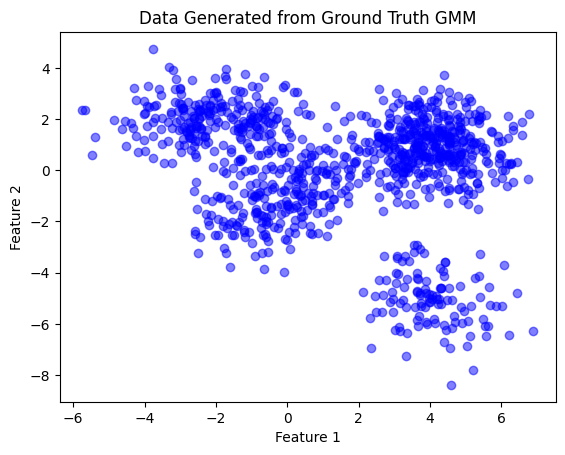

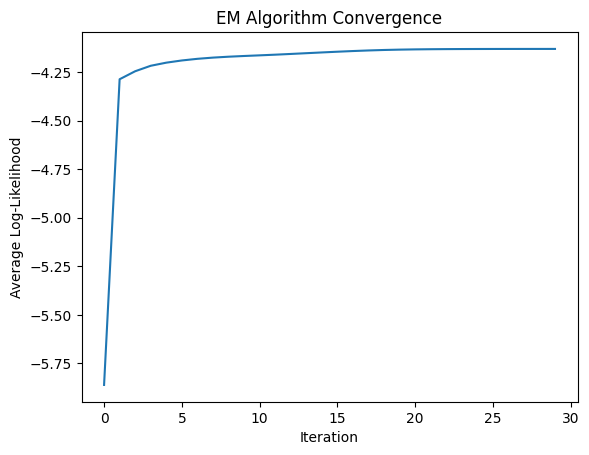

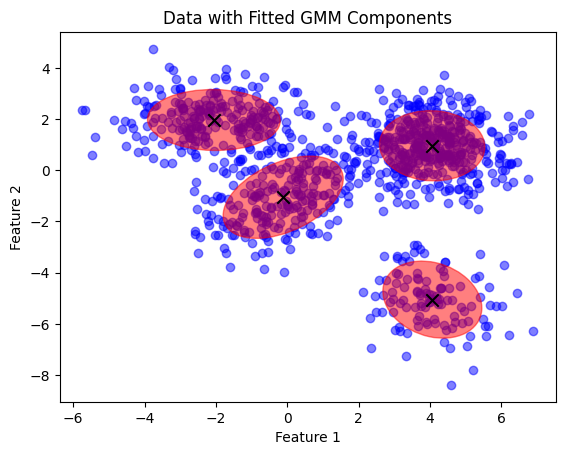

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
from scipy import linalg

# Set a random seed for reproducibility
np.random.seed(3)

class GMM:
    def __init__(self, n=1e3, d=2, K=4):
        self.n = int(n)  # Number of data points to generate
        self.d = d       # Dimensionality of the data
        self.K = K       # Number of clusters (Gaussian components)
        self.X = np.zeros((self.n, self.d))  # Placeholder for data points
        self.mu = np.zeros((self.d, self.K))  # Means of Gaussian components (to be learned)
        self.sigma = np.zeros((self.d, self.d, self.K))  # Covariance matrices of components
        self.pik = np.ones(self.K) / K  # Mixing coefficients (initialized uniformly)

    def generate_data(self):
        """
        Generate synthetic data from a Gaussian Mixture Model (GMM).
        """
        # Generate mixing coefficients pi from a symmetric Dirichlet distribution
        alpha0 = np.ones(self.K)  # Parameters for Dirichlet distribution
        pi = np.random.dirichlet(alpha0)  # Mixing coefficients for the clusters

        # Generate ground truth means (mu0) for each cluster
        mu0 = np.random.randint(0, 10, size=(self.d, self.K)) - 5
        # mu0 is of shape (d, K), where each column is the mean of a Gaussian component

        # Generate ground truth covariance matrices (V0) for each cluster
        V0 = np.zeros((self.d, self.d, self.K))  # Placeholder for covariance matrices
        for k in range(self.K):
            # Generate random orthogonal matrix Q for eigenvectors
            Q, _ = np.linalg.qr(np.random.randn(self.d, self.d))
            # Diagonal matrix D of eigenvalues (positive to ensure positive-definite covariance)
            D = np.diag(np.abs(np.random.randn(self.d)))
            # Construct covariance matrix V0[:, :, k] = Q * D * Q^T
            V0[:, :, k] = Q @ D @ Q.T

        # Sample data points from the GMM
        for i in range(self.n):
            # Sample cluster assignment z_i from multinomial distribution with probabilities pi
            z = np.random.multinomial(1, pi)
            # Find the index k of the cluster for the data point
            k = np.nonzero(z)[0][0]
            # Sample data point from the k-th Gaussian component
            self.X[i, :] = np.random.multivariate_normal(mean=mu0[:, k], cov=V0[:, :, k], size=1)

        # Plot the generated data
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], color='b', alpha=0.5)
        plt.title("Data Generated from Ground Truth GMM")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

        return mu0, V0  # Return the true means and covariances for reference

    def gmm_em(self):
        """
        Fit a Gaussian Mixture Model using the Expectation-Maximization (EM) algorithm.
        """
        # Initialize the means mu by randomly selecting K data points
        indices = np.random.choice(self.n, size=self.K, replace=False)
        self.mu = self.X[indices, :].T  # mu is of shape (d, K)

        # Initialize covariance matrices sigma to identity matrices
        for k in range(self.K):
            self.sigma[:, :, k] = np.eye(self.d)

        # Set parameters for the EM algorithm
        max_iter = 100  # Maximum number of iterations
        tol = 1e-5      # Tolerance for convergence
        obj = np.zeros(max_iter)  # Log-likelihood values for each iteration

        # EM algorithm loop
        for iter in range(max_iter):
            # E-step: compute responsibilities and log-likelihood
            resp, llh = self.estep()

            # M-step: update parameters using the responsibilities
            self.mstep(resp)

            # Store log-likelihood for convergence check
            obj[iter] = llh

            # Check for convergence
            if iter > 1 and np.abs(obj[iter] - obj[iter - 1]) < tol * np.abs(obj[iter]):
                break  # Stop if the change in log-likelihood is below the threshold

        # Plot the log-likelihood over iterations
        plt.figure()
        plt.plot(obj[:iter + 1])
        plt.title("EM Algorithm Convergence")
        plt.xlabel("Iteration")
        plt.ylabel("Average Log-Likelihood")
        plt.show()

    def estep(self):
        """
        E-step: Compute the responsibilities (posterior probabilities) and log-likelihood.
        Corresponds to computing r_{ik} in Equation (5):
        r_{ik} = p(z_i = k | x_i, θ^{(k-1)}) = [N(x_i | μ_k, Σ_k) π_k] / [∑_{l=1}^K N(x_i | μ_l, Σ_l) π_l]
        """

        ### BEGIN SOLUTION
        
        # Initialize responsibilities matrix
        r = np.zeros((self.n, self.K))

        # Compute the numerator of responsibilities for each data point and cluster
        for k in range(self.K):
            # Compute probability density of data under Gaussian component k
            # This is p(x_i | z_i = k, θ_k)
            pdf = multivariate_normal.pdf(self.X, mean=self.mu[:, k], cov=self.sigma[:, :, k])
            
            # Multiply by mixing coefficients: π_k * p(x_i | z_i = k, θ_k)
            r[:, k] = self.pik[k] * pdf

        # Compute the total probability (marginal likelihood) for each data point
        L = np.sum(r, axis=1)

        # Compute average log-likelihood over all data points
        llh = np.mean(np.log(L))  # This is the objective function value (average log-likelihood)

        # Normalize responsibilities
        resp = r / L[:, np.newaxis]

        ### END SOLUTION

        return resp, llh


    def mstep(self, resp):
        """
        M-step: Update the parameters using the computed responsibilities.
        Update mixing coefficients π_k, means μ_k, and covariances Σ_k.
        Corresponds to Equations (7), (11), and (14):
        π_k = (1 / N) ∑_{i=1}^N r_{ik}
        μ_k = [∑_{i=1}^N r_{ik} x_i] / [∑_{i=1}^N r_{ik}]
        Σ_k = [∑_{i=1}^N r_{ik} (x_i - μ_k)(x_i - μ_k)^T] / [∑_{i=1}^N r_{ik}]
        """

        ### BEGIN SOLUTION
        
        # Compute effective number of data points assigned to each cluster: n_k = ∑_{i=1}^N r_{ik}
        nk = np.sum(resp, axis=0)  # Shape: (K,)

        # Update mixing coefficients π_k = n_k / N (Equation 7)
        self.pik = nk / self.n

        for k in range(self.K):
            # Update means μ_k (Equation 11)
            # μ_k = [∑_{i=1}^N r_{ik} x_i] / n_k
            self.mu[:, k] = np.sum(resp[:, k][:, np.newaxis] * self.X, axis=0) / nk[k]

            # Update covariance matrices Σ_k (Equation 14)
            # Σ_k = [∑_{i=1}^N r_{ik} (x_i - μ_k)(x_i - μ_k)^T] / n_k
            Xm = self.X - self.mu[:, k]  # Centered data (x_i - μ_k)
            # Multiply centered data by responsibilities r_{ik}
            weighted_Xm = resp[:, k][:, np.newaxis] * Xm
            # Compute Σ_k = [weighted_Xm^T @ Xm] / n_k
            self.sigma[:, :, k] = (weighted_Xm.T @ Xm) / nk[k]
            # Add a small value to the diagonal for numerical stability (avoid singularity)
            self.sigma[:, :, k] += 1e-6 * np.eye(self.d)

        ### END SOLUTION

# Create a GMM instance
gmm = GMM()

# Generate synthetic data
mu0, V0 = gmm.generate_data()

# Fit GMM using the EM algorithm
gmm.gmm_em()

# Plot the data and the fitted Gaussian components
plt.figure()
ax = plt.axes()
plt.scatter(gmm.X[:, 0], gmm.X[:, 1], color='b', alpha=0.5)

# Plot the estimated Gaussian components as ellipses
for k in range(mu0.shape[1]):
    # Compute eigenvalues and eigenvectors of covariance matrix
    v, w = linalg.eigh(gmm.sigma[:, :, k])

    # Compute lengths of ellipse axes (scaled for visualization)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

    # Compute angle of ellipse rotation
    u = w[0] / linalg.norm(w[0])

    # Calculate the angle in degrees
    if u[0] == 0:
        angle = 90.0 if u[1] > 0 else -90.0  # Assign 90 degrees or -90 degrees based on u[1]
    else:
        angle = np.degrees(np.arctan(u[1] / u[0]))  # Convert from radians to degrees

    # Create an ellipse representing the Gaussian component
    ell = mpl.patches.Ellipse(
        gmm.mu[:, k], width=v[0], height=v[1], angle=180.0 + angle, color='r', alpha=0.5
    )
    ax.add_patch(ell)

    # Plot the cluster centroid
    plt.scatter(gmm.mu[0, k], gmm.mu[1, k], s=80, marker='x', color='k', alpha=1)

plt.title("Data with Fitted GMM Components")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()